<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

--- 
# Part 1

Part 1 requires researching the problem and setting up the project.

---

## Problem Statement

I represent a research team at [Zillow Group](https://career.zillowgroup.com/careers).  We are trying to develop a tool to determine the sale price of on-the-market homes in different urban centers in America.  We want to share this tool with our customers, and we want it to be specific enough and precise enough that we can offer it to them at a premium subscription price.  Our customers will benefit from having an accurate Real Estate Calculator because they can then know how to price their homes (as sellers) or what bids to offer (as buyers).  

From experience, we know that understanding the behavior of the national real-estate market is not specific enough and is difficult to model.  So for this project, we are going to focus on the urban center of Ames, Iowa.  We reached out to the Assessor's office, and they kindly shared their asset-evaluation [data](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).  We will use this data to build a model to predict the price of a new home sale.

We also want to identify which features impact the price (higher coefficients in the linear model) the most?  Are there any features which have a negative impact?

### Datasets
To analyze this problem, we are using housing data from the Assessor's office in Ames, Iowa.
<br>For modeling, I am using the train.csv file in the github repo under datasets/.
<br>Then I will run my model to predict the prices in the test.csv file and submit my prices by ID to Kaggle.

### Data Dictionary

This project comes with a very thorough data dictionary available [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).
<br>As I go through this project, I create a few new features, which I will describe below.
<br>I am not naming the various dummy columns created for the nominal values, because those are part of features described at the link.

**My Data Dictionary**

|Feature|Type|Description|
|---|---|---|
|outdoor_fin_sf|*float*|Total of all usable outdoor amenities (wood_deck, open_porch, enclosed_porch,'3ssn_porch',screen_porch,pool_area)|
|baths|*float*|Total of all baths above ground in the house (full_baths + (0.5xhalf_baths)|
|bsmt_baths|*float*|Total of all baths in the basement of the house (full_baths + (0.5xhalf_baths)|

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

### Module Import

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import & Summaries

In [2]:
#initialize raw dataframe that i can refer back to if needed
ames = pd.read_csv('./datasets/train.csv')
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#what are all the feature names
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

#### Initial thoughts on the Features

I spent a good couple hours just trying to understand all the features, how they're categorized, and some additional real-estate jargon.  This list describes my high-level thoughts on most of them, some involving additional research.
Cross-referencing from [data-dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt):

* MS SubClass - type of dwelling: technically nominal, so I will cast this as an object
* MS Zoning - zoning classification (low density vs industrial etc): useful, but need to dummify
* Lot Frontage - street size in front of property, not super relevant
* Lot Area - continuous, square footage
* Street - type of street access
* Alley - type of alley access
* Lot Shape - anything other than regular would be a deduction
* Land Contour - similar to Lot Shape
* Utilities - ordinal, need to encode
* Lot Config - type of config, would dummify
* Land Slope - similar to Lot Shape, anything other than gentle would be a deduction
* Neighborhood - useful, would need to dummify
* Condition 1/Condition 2 - not sure how much info second category adds, probably has a lot of 'None's
* Bldg Type - type of family dwelling (single-fam vs duplex vs townhouse etc)
* House style - style (num of stories, split foyer)
* Overall Qual - ordinal, from very poor to very excellent (material and finish)
* Overall Cond - ordinal, from very poor to very excellent (condition)
* Year Built - discrete, age
* Year Remod/Add - discrete, year of latest construction (original date if no new construction)
* Roof Style/Roof Matl - nominal categories, need dummies
* Exterior 1/Exterior 2 - similar to Condition 1/2, does the 2nd column add any value?
* Mas Vnr Type - type of face, needs dummy
* Mas Vnr Area - continuous
* Exter Qual/Exter Cond - ordinal, from poor to excellent
* Foundation - type, needs dummy
* Bsmt Qual - height, from poor to excellent (NA)
* Bsmt Cond - general condition, from poor to excellent (NA)
* Bsmt Exposure - walkout exposure, from none to good
* BsmtFin Type1/Type2 - quality of finished living quarters, from unf to good quality
* BsmtFin SF 1/SF 2 - sq ft of finished basement
* Bsmt Unf Sf - sq ft of unfinished basement
* Total Bsmt SF - total sq ft of basement (might be sum of sf1/sf2/unf_sf)
* Heating - type, needs dummy
* HeatingQC - quality of heating, from poor to excellent
* Central Air - binary, yes or no
* Electrical - quality, needs encoding
* 1st Flr SF/2nd Flr SF/Low Qual Fin SF - sq ft of different layouts (each could be 0)
* Gr Liv Area - above ground living area square foot (seems to be mentioned in the documentation a lot) (might be sum of above)
* Bsmt Full Bath/Bsmt Half Bath/Full Bath/Half Bath - can all be combined into 'Baths'?
* Bedroom - # of discrete rooms above grade
* Kitchen - # of discrete kitchens above grade
* KitchenQual - quality of kitchen, from poor to excellent
* TotRmsAbvGrd - total # of livable rooms
* Functional - home functionality, from salvage only to typical, anything other than typical is a deduction
* Fireplaces/FireplaceQu - number and quality (encoding) of fireplaces
* Garage Type - type, needs dummies
* Garage Yr Blt - might be empty if house has no garage
* Garage Finish - interior finish quality, from none to finished
* Garage Cars - num of cars that fit
* Garage Area - size in sq ft
* Garage Qual - quality, from poor to excellent (NA)
* Garage Cond - condition, from poor to excellent (NA)
* Paved Drive - type of driveway, anything other than paved is a deduction
* Wood Deck SF/Open Porch SF/Ecnlosed Porch/3-Ssn Porch/Screen Porch - can all be combined into 'porch/deck sq ft'
* Pool Area - could be combined with other outdoor area (above) or kept separate
* Pool QC - quality, needs encoding
* Fence - quality, needs encoding
* Misc Feature - various types, needs dummies
* Misc Val - value of additional assets
* Mo Sold - month of sale
* Yr sold - year of sale, but hard to use as a predictor since you can't repeat a year
* Sale type - type, needs dummies
* Sale Condition - normal vs abnormal/adjland/family/partial - would be good to investigate further

#### Rename Columns

In [4]:
#apply snake_case to all columns
ames.columns = [col.lower().replace(' ', '_') for col in ames.columns]
ames.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


#### Summary Info

In [5]:
ames.info()
# quite a few features have null values, I will need to explore that further
# there's a big spread of ints/floats/objects. 
# The data dictionary describes 4 types of data: nominal, ordinal, discrete, continuous
# Discrete and continuous will be interpreted by the model similarly, 
# but nominal and ordinal have to be encoded before they can be used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [6]:
#this info is in the data documentation, it will probably be helpful later when I need to do encoding

nominal = ['ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'misc_feature', 'sale_type']
ordinal = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']
discrete = ['year_built', 'year_remod/add', 'overall_qual', 'overall_cond', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold']
continuous = ['lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val']

#cast ms_subclass as object
ames['ms_subclass'] = 'ms' + ames['ms_subclass'].astype(str)

#create subsets of categoricals and numerics
categorical = ames.select_dtypes(include='object').columns
numeric = ames._get_numeric_data().columns
print(len(categorical),len(numeric))
#adds up to 81

43 38


In [7]:
# descriptive statistics of numeric features
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0
bsmtfin_sf_1,2050.0,4.423005e+02,4.612041e+02,0.0,0.0,368.0,7.337500e+02,5644.0


In [8]:
# descriptive statistics of categorical features
ames[categorical].describe().T

,count,unique,top,freq
ms_subclass,2051,16,ms20,770
ms_zoning,2051,7,RL,1598
street,2051,2,Pave,2044
alley,140,2,Grvl,85
lot_shape,2051,4,Reg,1295
land_contour,2051,4,Lvl,1843
utilities,2051,3,AllPub,2049
lot_config,2051,5,Inside,1503
land_slope,2051,3,Gtl,1953
neighborhood,2051,28,NAmes,310


### Exploratory Data Analysis (EDA) & Visualizations

#### Comparing Features to SalePrice

As part of my EDA, I want to automatically generate lots of graphs for all (or a subset of) the features.  I found a way to make a function to do this using [StackOverflow] (https://stackoverflow.com/questions/20174468/how-to-create-subplots-of-pictures-made-with-the-hist-function-in-matplotlib-p) and a couple other resources.

I defined all the functions here and will use them immediately, plus a few times later in the notebook.

In [9]:
#this code was inspired from StackOverflow on multi-plot graphing
def eda_histograms(df, columns, title):
    '''fn generates matrix of histograms'''
    nrows = int(np.ceil(len(columns)/5)) 
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=(15, nrows*2.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(columns): 
        a = sns.histplot(data=df, x=df[column], ax=ax[i], color='#00cfcc')
        a.set_title(column,fontsize=12)
        a.set(xlabel=None, ylabel=None)
        a.tick_params(labelsize=8)
    plt.tight_layout(pad=1.2)
    
    #Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1
        
    plt.suptitle(title, fontsize=20, y=1.015)

In [10]:
#also inspired from StackOverflow
def eda_scatterplot(df, columns, target, title):  
    '''fn generates matrix of scatterplots'''
    nrows = int(np.ceil(len(columns)/5))
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*2.5))
    ax = ax.ravel()
    for i, column in enumerate(columns):
        a = sns.regplot(data=df, x=column, y=target, ax=ax[i], color='#ff9973', line_kws={'color': 'red'})
        a.set_title(column, fontsize=12)
        a.set(xlabel=None, ylabel=None)
    plt.tight_layout(h_pad=0.5, w_pad=-0.2)
    
    # Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle(title, fontsize=20, y=1.015)

In [11]:
#same inspiration from StackOverflow
def eda_barplot(df, columns, target, title):   
    '''fn generates matrix of barplots'''
    nrows = int(np.ceil(len(columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*4))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(columns):
        a = sns.barplot(data=df, y=column, x=target, ax=ax[i], orient='h', palette='RdPu_r')
        a.set_title(column, fontsize=12)
        #sns.color_palette("rocket")
        a.set(xlabel=None, ylabel=None,
              xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000], 
              xticklabels=['0','100k','200k','300k','400k','500k','600k'])
    plt.tight_layout(pad=1.2)
    
    # Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle(title, fontsize=20, y=1.015)

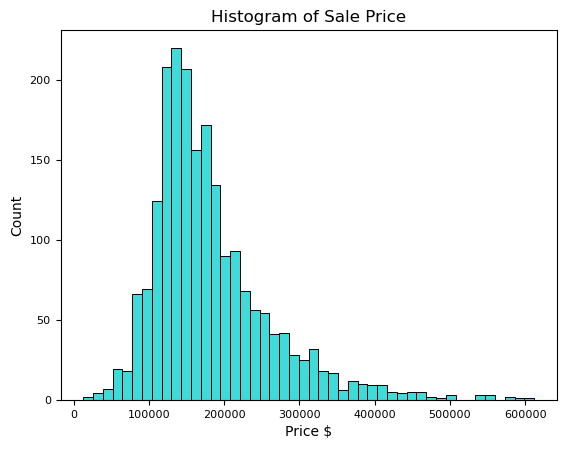

In [12]:
#Histogram for just saleprice
sp = sns.histplot(data=ames, x='saleprice', color='#00cfcc')
sp.set_title('Histogram of Sale Price',fontsize=12)
sp.set(xlabel='Price $')
sp.tick_params(labelsize=8)

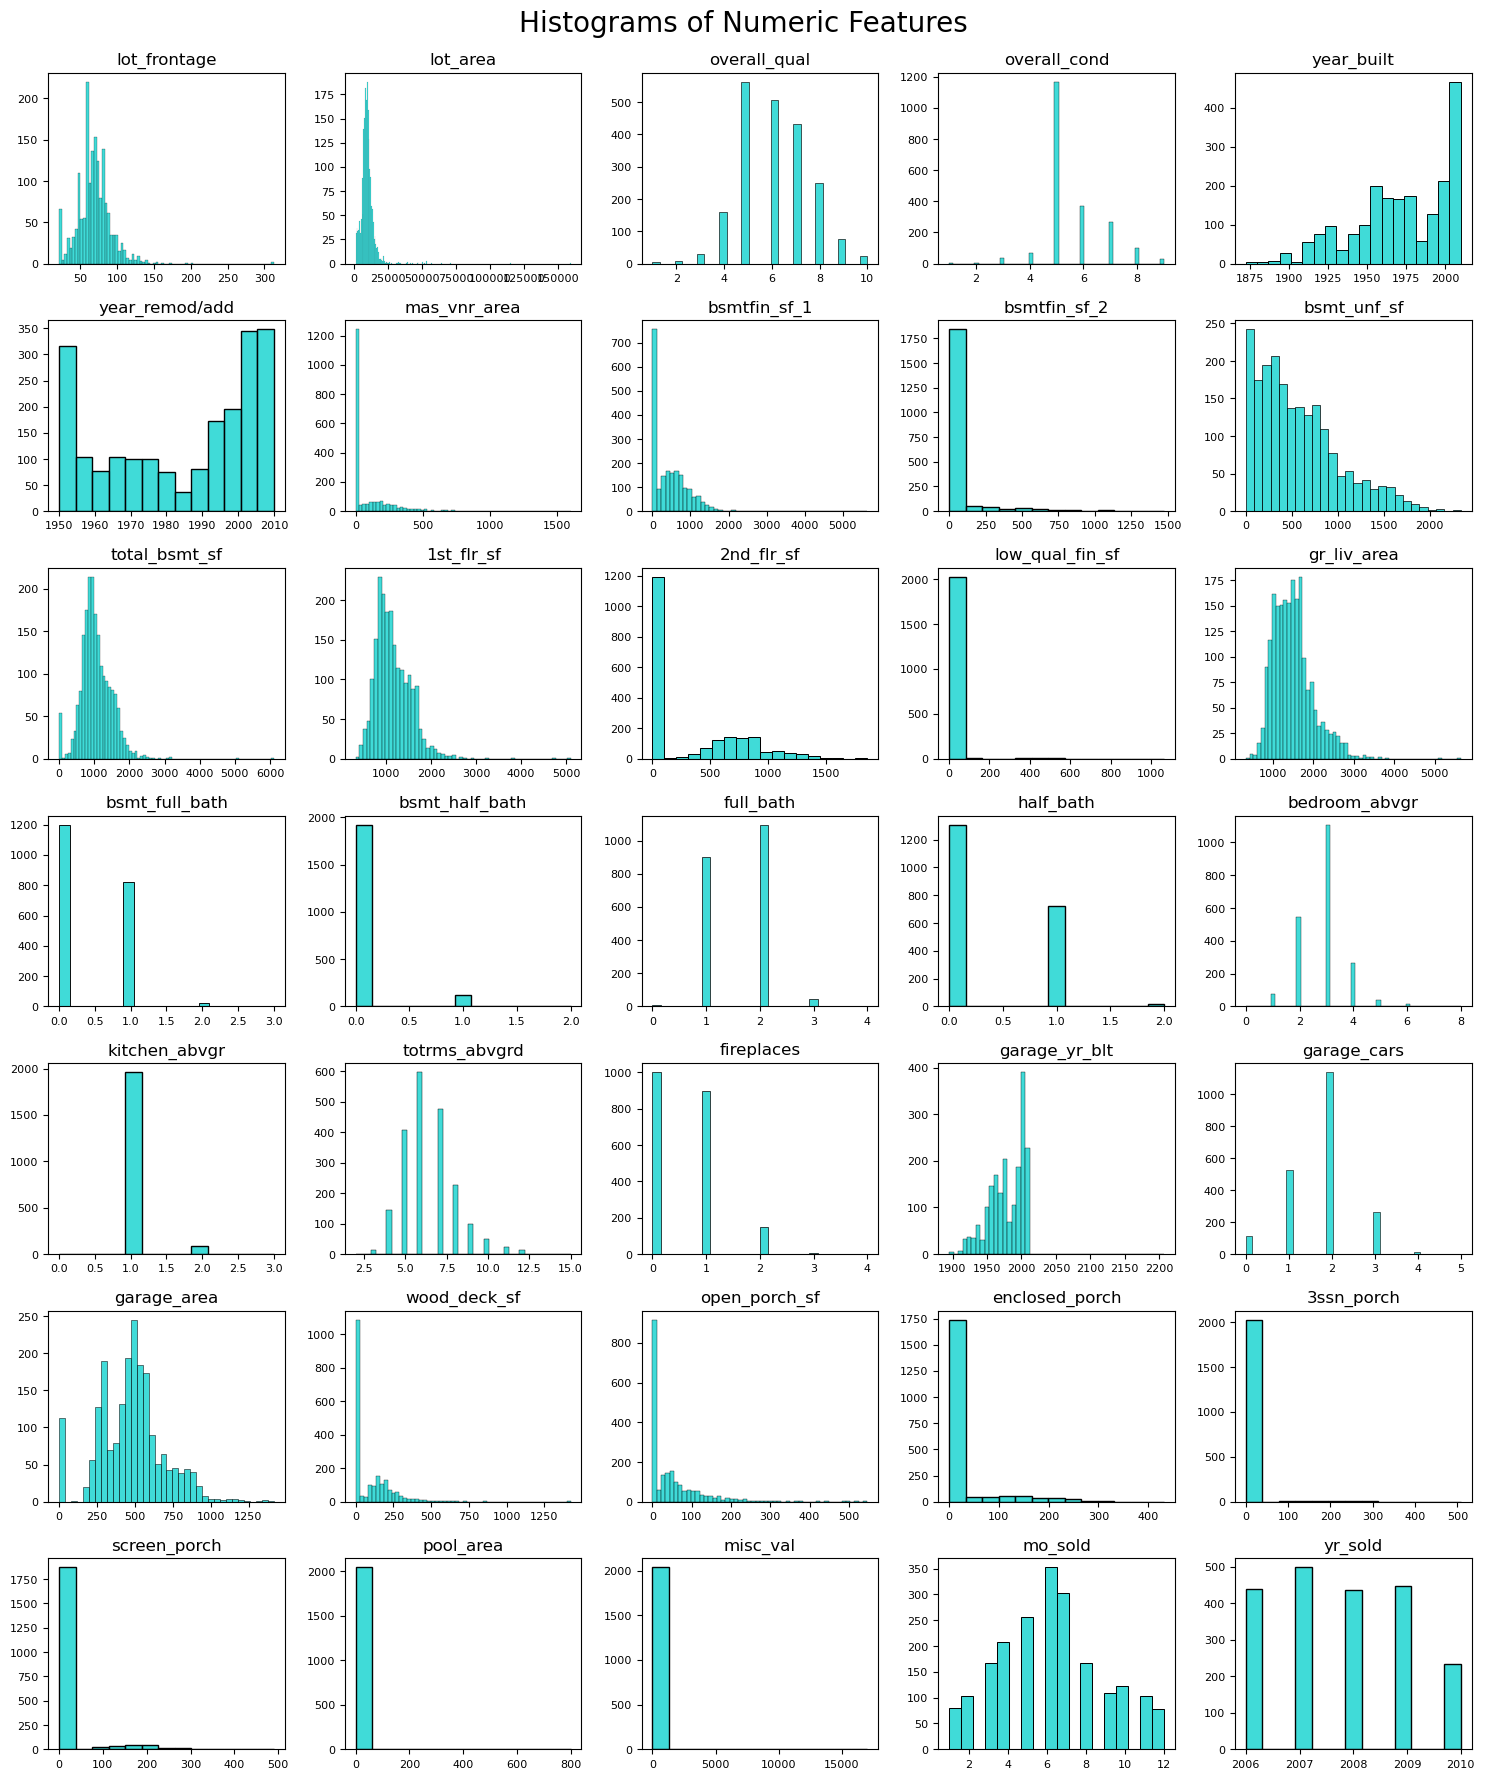

In [13]:
eda_histograms(ames, numeric.drop(labels=['id', 'pid', 'saleprice']), 'Histograms of Numeric Features')

**Histogram Interpretations**

A few things stand out from these histograms:

   * `saleprice` is pretty normally distributed, with a bit of a right skew.  This makes sense, the mean housing price for most markets is on the lower end of the spectrum, but there are plenty of obscenely expensive homes that enter the market.  There aren't as many 'obscenely cheap' homes because those would tend to be unlivable: there is even a feature in this dataset for `functional` where an option is `salvage_only`, but the probability of seeing these homes on the market is much lower than seeing an expensive house.
   * `mo_sold` is normally distributed around summer
   * many of the columns describing optional home features (porches, pools, misc, etc) have a huge right skew because so many of these values are 0, indicating those homes do not have that feature. 
   * the values for the common home features (we'd often expect a home to have at least one or some amount) are pretty normally distributed, with a bit of a right skew (garage_area, totrms_abvgrd, bedroom_abvgrd, full_bath, gr_liv_area, lot_frontage)
   * some of these features refer to similar home attributes, I will have to see if combining them improves their normality or not
    

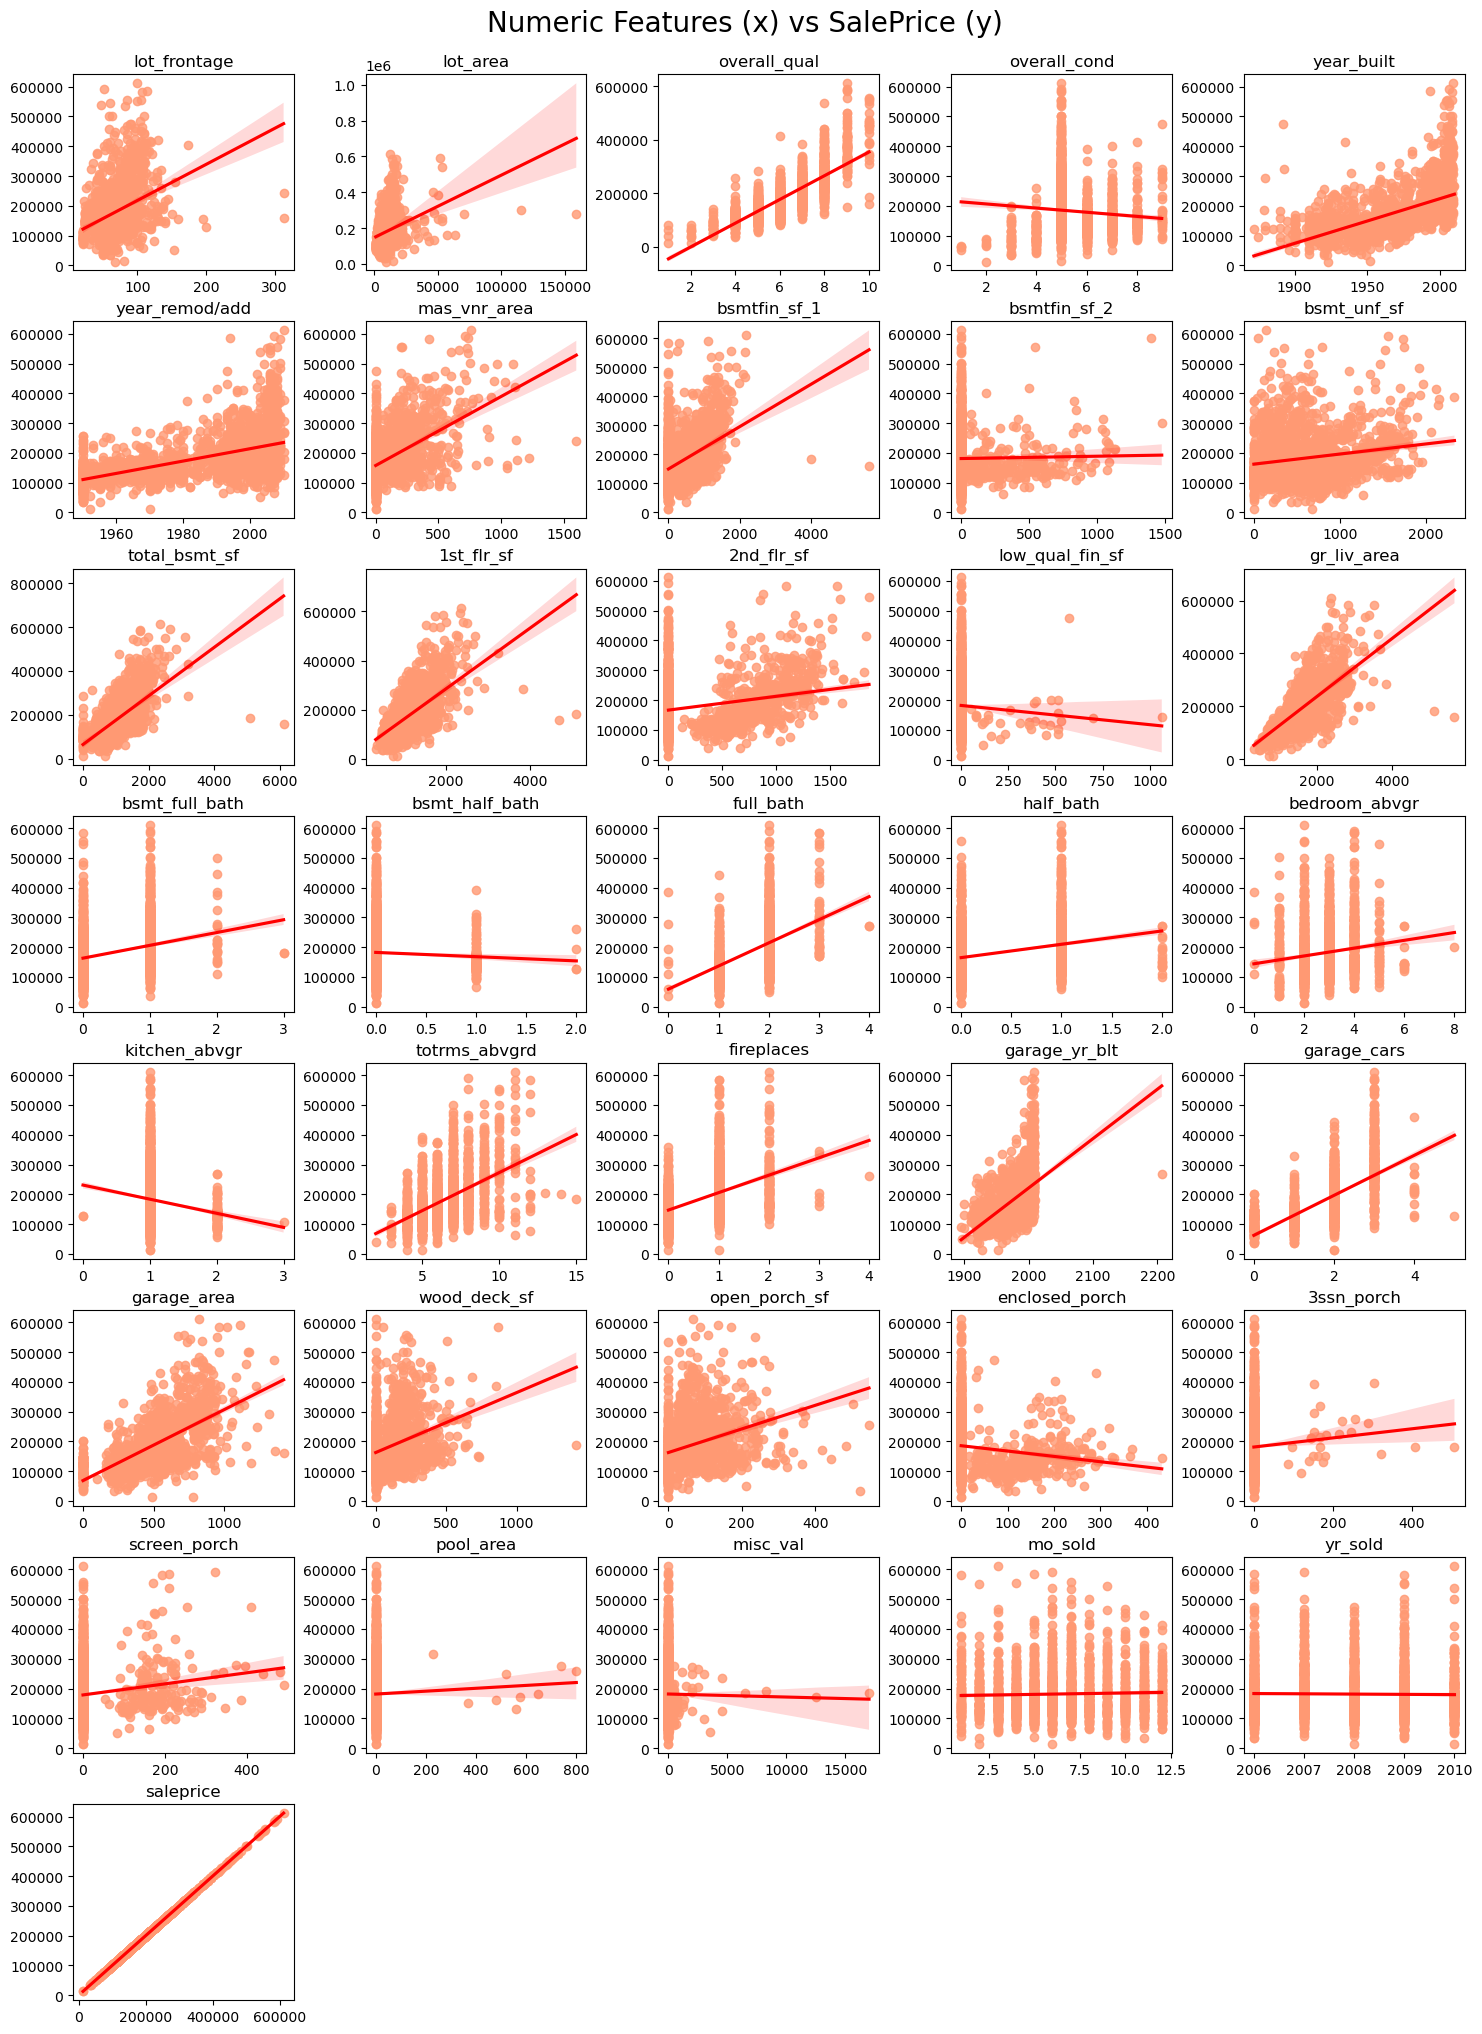

In [14]:
eda_scatterplot(ames, numeric.drop(labels=['id','pid']), 'saleprice', 'Numeric Features (x) vs SalePrice (y)')

**Scatter Plot Interpretations**

A few things stand out from the scatter plots:

* Many of these features show a linear relationship with `saleprice` but square footage features (especially less specific ones like gr_liv_area) show the most significant change per unit.
* `overall_qual` has a strong positive trend, as well as any age related features
* time of sale does *not* have a positive slope. both `mo_sold` and `yr_sold` do not seem to affect the price at all
* a few features have a negative relationship, but this appears to be due to skew in the data
* there are a few noticeable outliers, specifically in `gr_liv_area` and `garage_yr_blt`.  I will remove those.

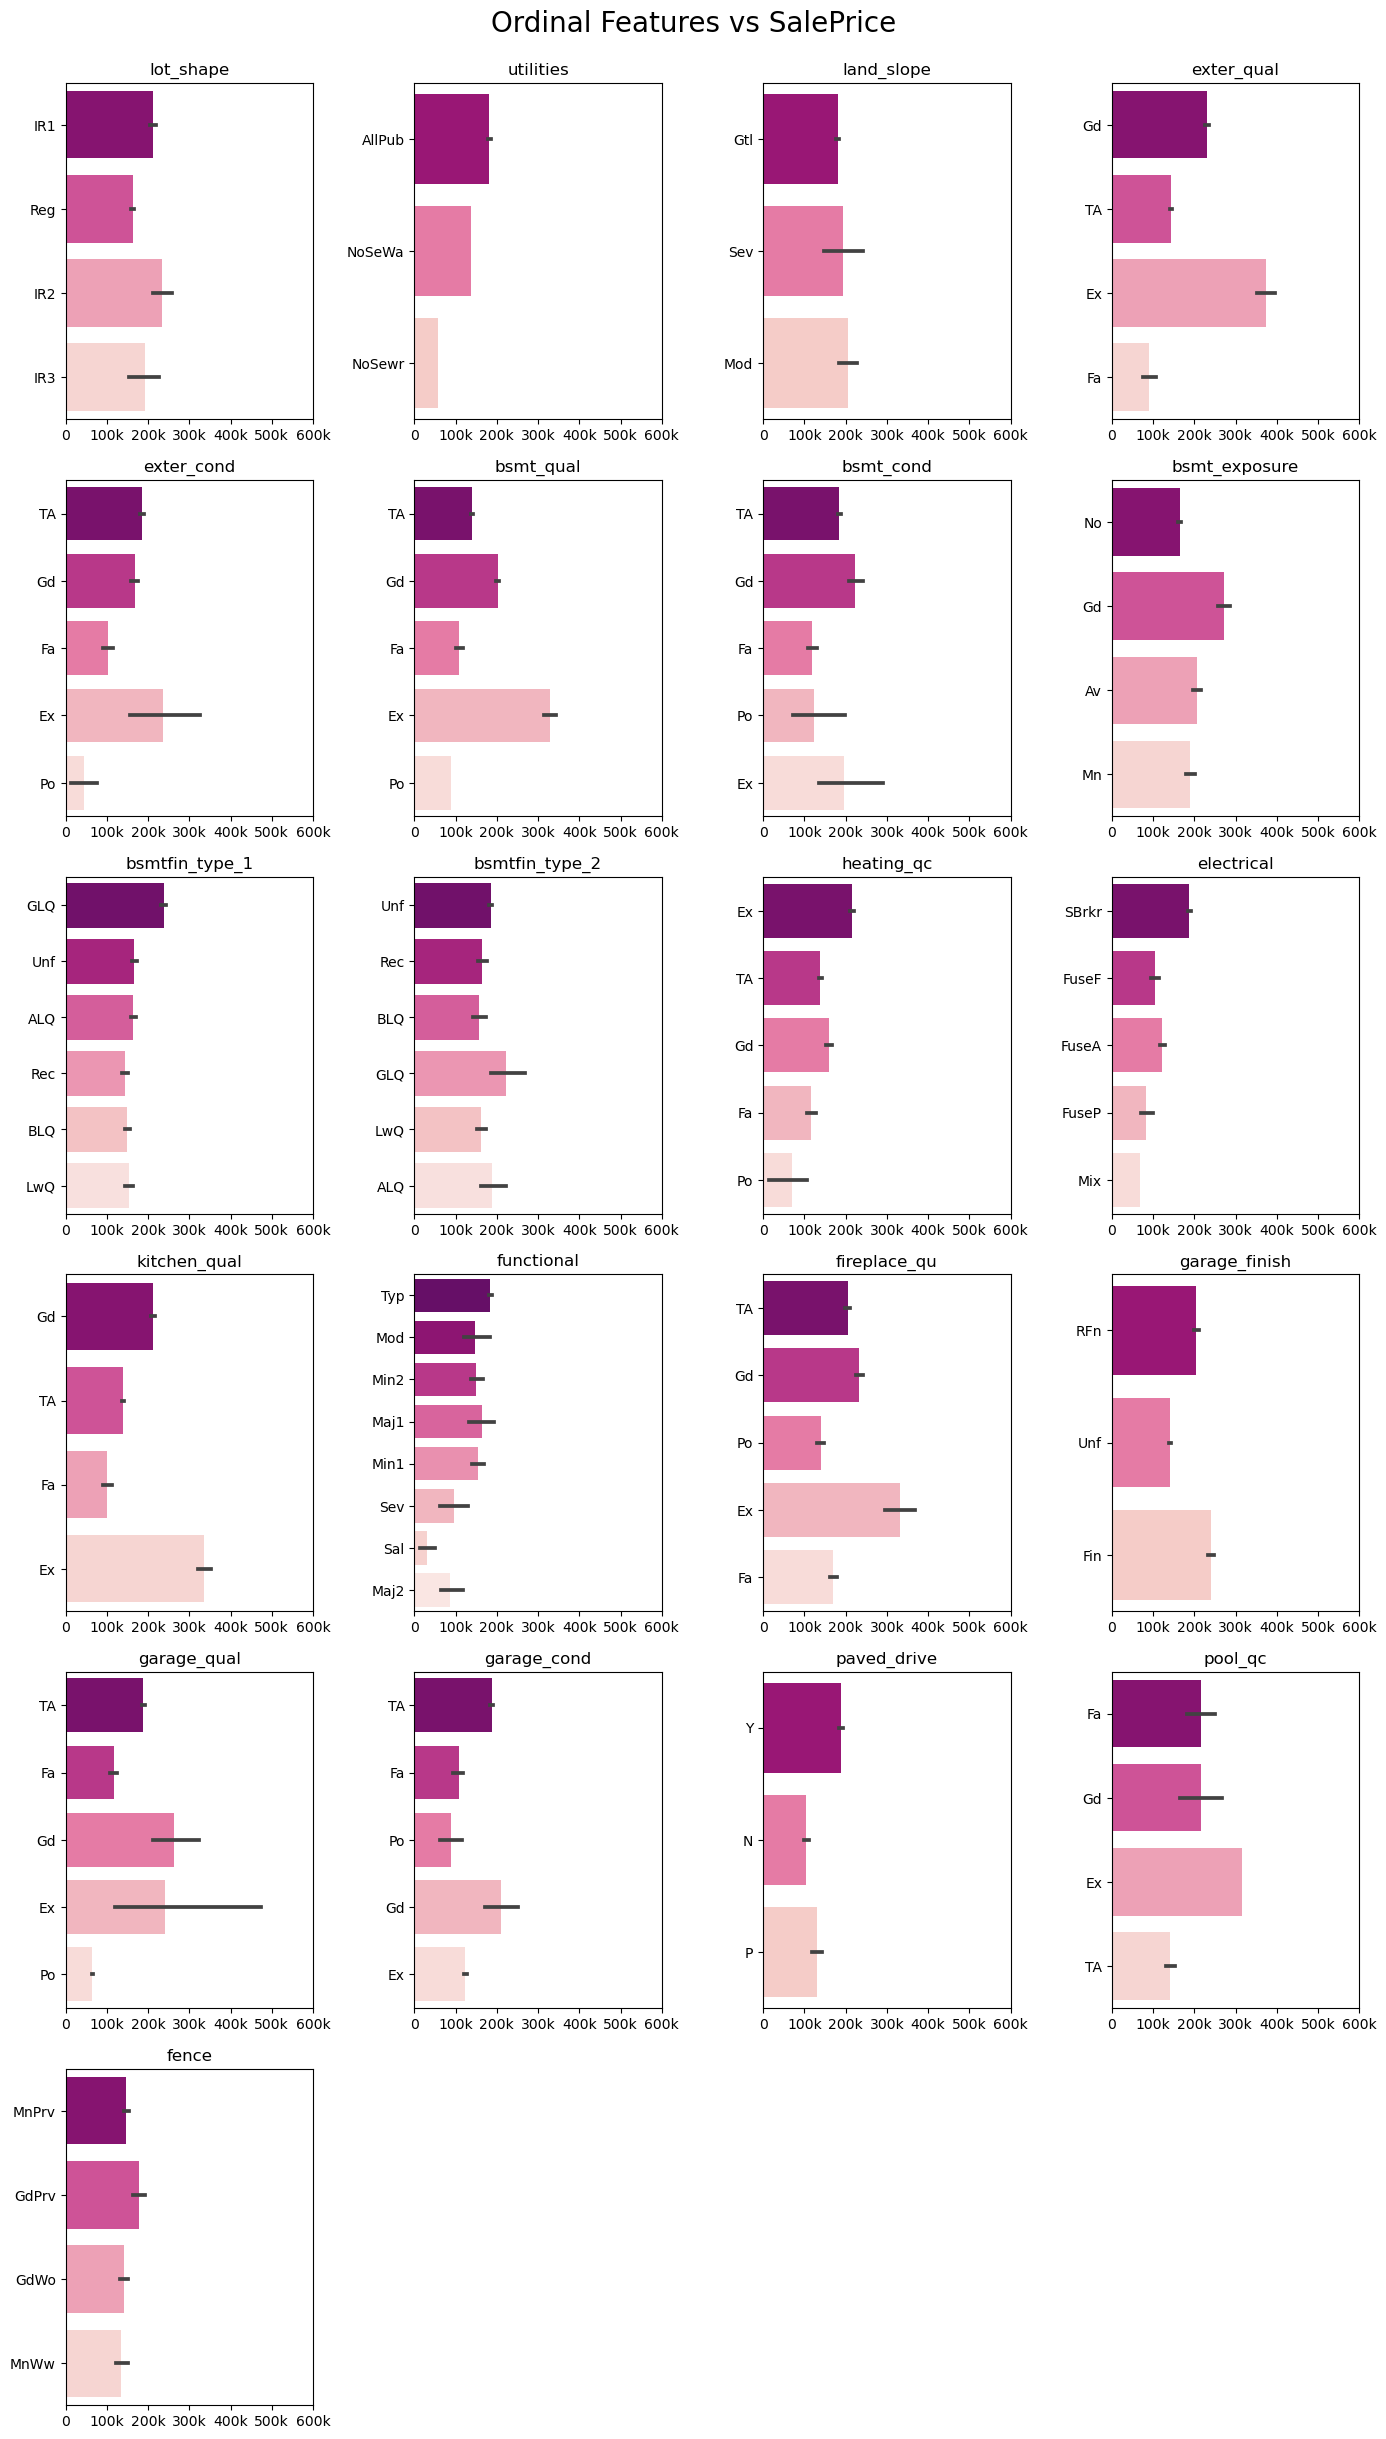

In [15]:
eda_barplot(ames, ordinal, 'saleprice', 'Ordinal Features vs SalePrice')

**Ordinal Bar Plot Interpretations**

A few things stand out from the bar plots:

These features are not currently encoded or even arranged from (bad) to (good).  But here's an example of an ordinal feature from the dictionary:

Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

* The `Ex` and `Gd` values do tend to have higher prices than the others but this is not true for every single graph, which makes sense: better quality is worth a premium.  The other 'positive' options are also priced higher (like `yes` for `paved_drive` or `fin` for `garage_finish`)
* Notably, `kitchen_qual` has a big jump in price from `Gd` to `Ex`. From the histograms, `kitchen_abvgrd` was one of the few features that was negative.  This could be because of skew, but it also seems logical that a customer would pay a premium for one excellent kitchen instead of two or more average kitchens.

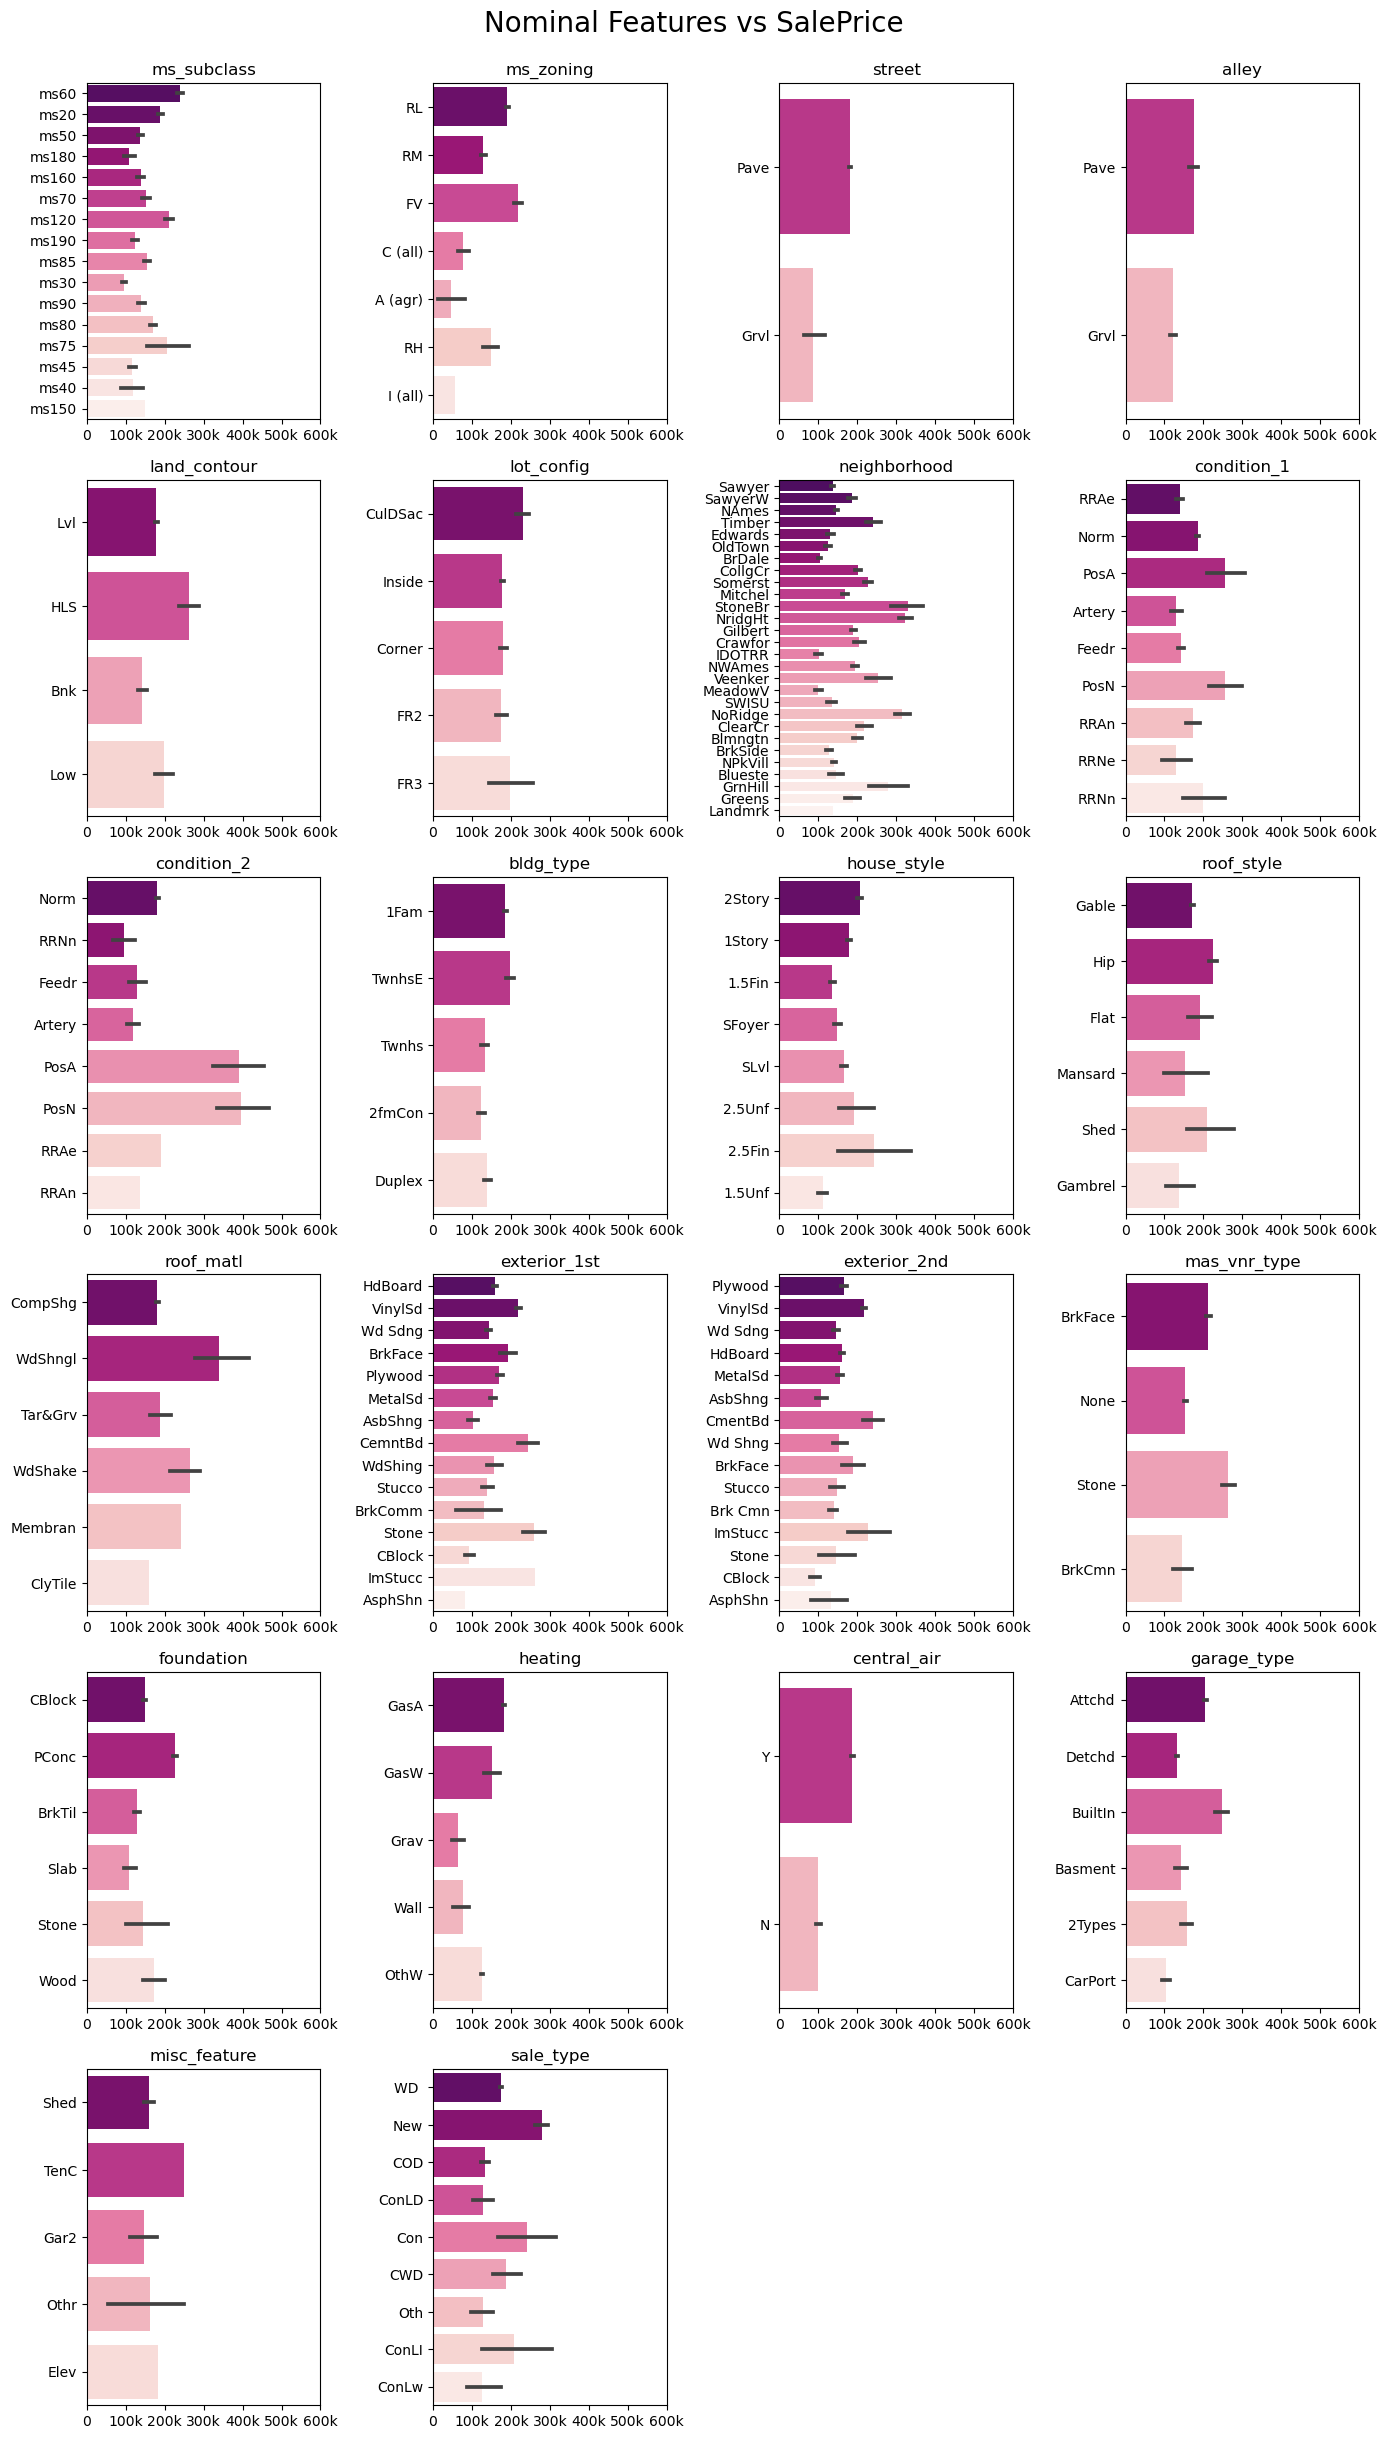

In [16]:
eda_barplot(ames, nominal, 'saleprice', 'Nominal Features vs SalePrice')

**Nominal Bar Plot Interpretations**

A few things stand out from the bar plots:

These features are not considered ordinal, so there isn't a clear indication of an option being 'better' than the others from the dictionary.  However, some might reflect higher prices because they're favored by customers.

* `garage_type` = `BuiltIn` reflects higher prices, likely because it is the most convenient option for homeowners.  This is similar for many of the other features.
* there are a few features which seem like ordinal binary values: `central_air`, `street`, and `alley`.  OneHotEncoder and OrdinalEncoder will essentially do the same thing (one column where the 0 or 1 indicates the value) so I'll run OHE on it later
* a lot of these other features don't have noticeable trends, so we will have to encode them as dummies and see how the model reacts

### Looking at nulls

Here, I will look at the unique values and histograms of all the features with null values.  If there are already a lot of 0's or NA's/None's in a column, then I could impute it with the same. I might get some other insights as well.

In [17]:
#look further at all the columns with null values

#feedback_text = []
nul_col = []
for col in ames.columns:
    if ames[col].isnull().sum() > 0:
        print('\n', col, ':', ames[col].isnull().sum(), 'nulls')
        print(ames[col].unique())
        nul_col.append(col)
        #feedback_text.append(input())  #used this code the first time I ran the cell, but saved output in markdown below


 lot_frontage : 330 nulls
[ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]

 alley : 1911 nulls
[nan 'Pave' 'Grvl']

 mas_vnr_type : 22 nulls
['BrkFace' 'None' nan 'Stone' 'BrkCmn']

 mas_vnr_area : 22 nulls
[2.890e+02 1.320e+02 0.000e+00 8.200e+01 1.800e+02 1.920e+02 2.320e+02
 4.560e+02 1.480e+02       nan 3.000e+00 3.360e+02 4.800e+02 3.200e+02
 1.040e+02 3.350e+02 4.000e+01 1.100e+02 1.060e+02 5.130e+02 1.840e+02
 5.220e+02 1.430e+02 3

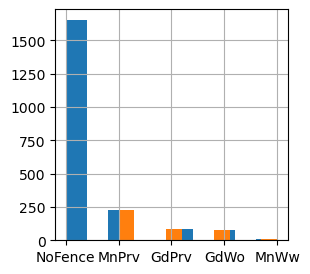

In [18]:
#there are a few features with more than 25% nulls (min 512 nulls):
#misc feature, fence, pool qc, fireplace qu, alley
#the nulls could be imputed with 'no [feature]', 
#but there won't be a normal distr of the values in these columns
#so it'll bias the model in some way

#for example:
ames['fence'].fillna('NoFence').hist(figsize=(3,3))
ames['fence'].hist();

#the blue is the distribution if I impute 'No Fence', and the orange is the distribution if those nulls are ignored.  
#imputation will greatly skew the data
#so instead, I will drop these 5 columns from the datasets

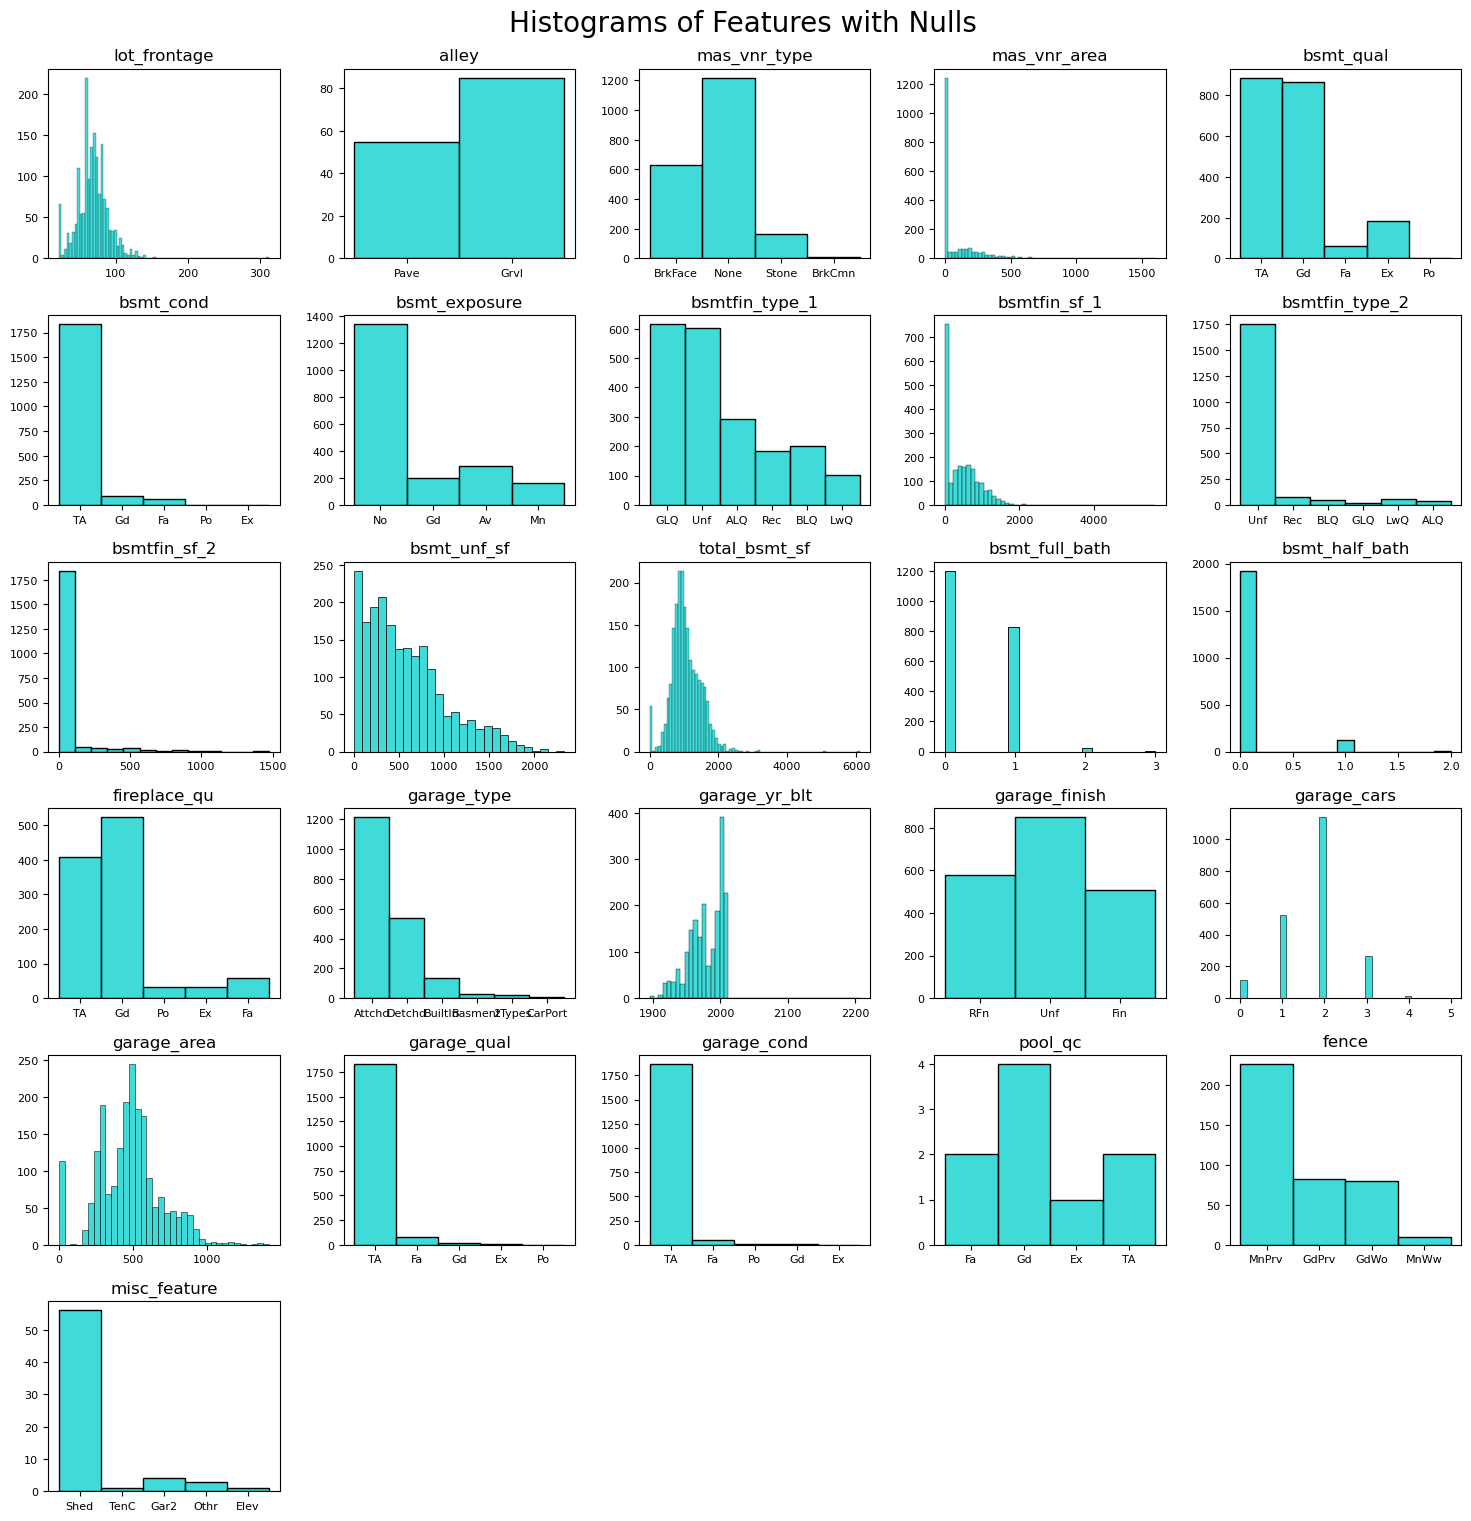

In [19]:
eda_histograms(ames, nul_col, 'Histograms of Features with Nulls')

**My thoughts on each column with null values**

```
for (col,feedback) in zip(ames.columns[ames.isna().any()].tolist(),feedback_text):
    print(col + ' (' + str(ames[col].isnull().sum()) + '): ' + feedback)
```

* lot_frontage (330):  area in front of house, 15% nulls, they could be 0 ('no lot frontage')
* alley (1911):  type of alley, nulls could be 'No Alley'
* mas_vnr_type (22):  type of mas vnr, nulls could also be 'None'
* mas_vnr_area (22):  surface area of mas vnr, nulls could be 0
* bsmt_qual (55):  quality of bsmt height, nulls could be 'no basement'
* bsmt_cond (55):  overall quality of bsmt, nulls could be 'no basement'
* bsmt_exposure (58):  exposure quality, nulls could be 'no exposure' or 'no basement'
* bsmtfin_type_1 (55):  first type of finish, nulls could be 'no basement'
* bsmtfin_sf_1 (1):  area of first type of basement, nulls could be 0
* bsmtfin_type_2 (56):  second type of finish, nulls could be 'no basement'
* bsmtfin_sf_2 (1):  area of second type of basement, nulls could be 0
* bsmt_unf_sf (1):  area of unfinished basement, nulls could be 0
* total_bsmt_sf (1):  area of total basement, nulls could be 0
* bsmt_full_bath (2):  number of full bsmt baths, nulls could be 0
* bsmt_half_bath (2):  number of bsmt half baths, nulls could be 0
* fireplace_qu (1000):  quality of fireplace, nulls could be 'no fireplace'
* garage_type (113):  type of garage, nulls could be 'no garage'
* garage_yr_blt (114):  age of garage, nulls could be 'no garage' or median
* garage_finish (114):  level of garage finish, nulls could be 'no garage'
* garage_cars (1):  size in #cars, nulls could be 0
* garage_area (1):  garage size in sq ft, nulls could be 0
* garage_qual (114):  quality of garage, nulls could be 'no garage'
* garage_cond (114):  condition of garage, nulls could be 'no garage'
* pool_qc (2042):  quality of pool, nulls could be 'no pool'
* fence (1651):  privacy level of fence, nulls could be 'no fence'
* misc_feature (1986):  type of misc feature, nulls could no 'no misc feat'

### Cleaning

#### Define all the columns with nulls>25%

In [20]:
#threshold for non-nulls is 75% of all observations
drop_col = [col for col in ames.columns if (ames[col].isnull().sum()>2051/4)]

#I decided not to drop them yet, because I will collect a list of all the columns I want to remove
#this makes it easier to apply it to both the train/test files
ames.head(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,ms60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


#### Drop outliers

In [21]:
#there were a few outliers seen above (that were also mentioned in the data documentation page)
#I will remove these before proceeding

#bad_rows
ames.drop(labels=ames[(ames['gr_liv_area']>4000)].index, inplace=True)
ames.drop(labels=ames[ames['garage_yr_blt']>2010].index, inplace=True)
ames.shape

(2048, 81)

### Correlation Analysis

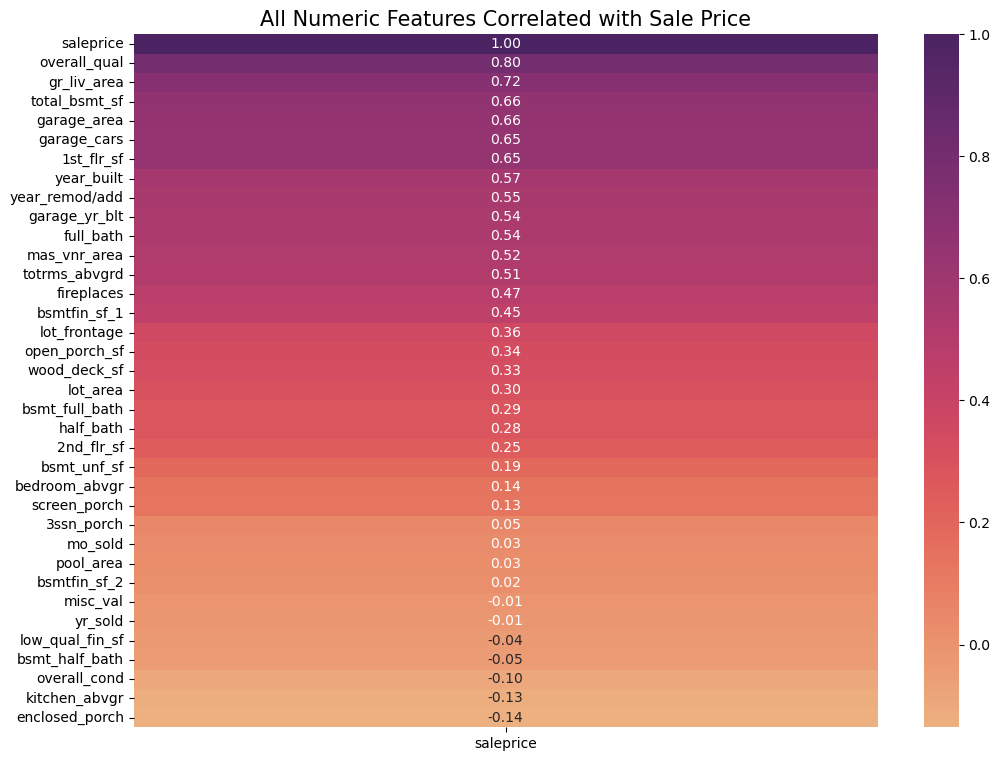

In [22]:
# Create mask for our correlated features
corr = ames.drop(columns=['id','pid']).corr()

#Plot heatmap of correlated features.
plt.figure(figsize=(12,9))
mask = np.ones_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr[['saleprice']].sort_values(by='saleprice',ascending=False), 
            cmap='flare', annot=True, fmt='.2f')
plt.title('All Numeric Features Correlated with Sale Price', fontsize=15);

High correlation (0.5 or higher): `overall_qual`, `gr_liv_area`, `total_bsmt_sf`, `garage_area`, `garage_cars`, `1st_flr_sf`, `year_built`, `year_remod/add`, `garage_yr_blt`, `full_bath`, `mas_vnr_area`, `totrms_abvgrd`.
<br> These positively correlated values are most likely going to be some of the ones that increase the saleprice the most.

Negative correlation (below 0): `low_qual_fin_sf`, `bsmt_half_bath`, `overall_cond`, `kitchen_abvgr`, `enclosed_porch`
<br> The negatively correlated values are not strongly related (the absolute value is below 0.2), but it suggests that as these features increase, the saleprice decreases.  We'll see if the model produces the same info (negative $\beta$ coefficients).

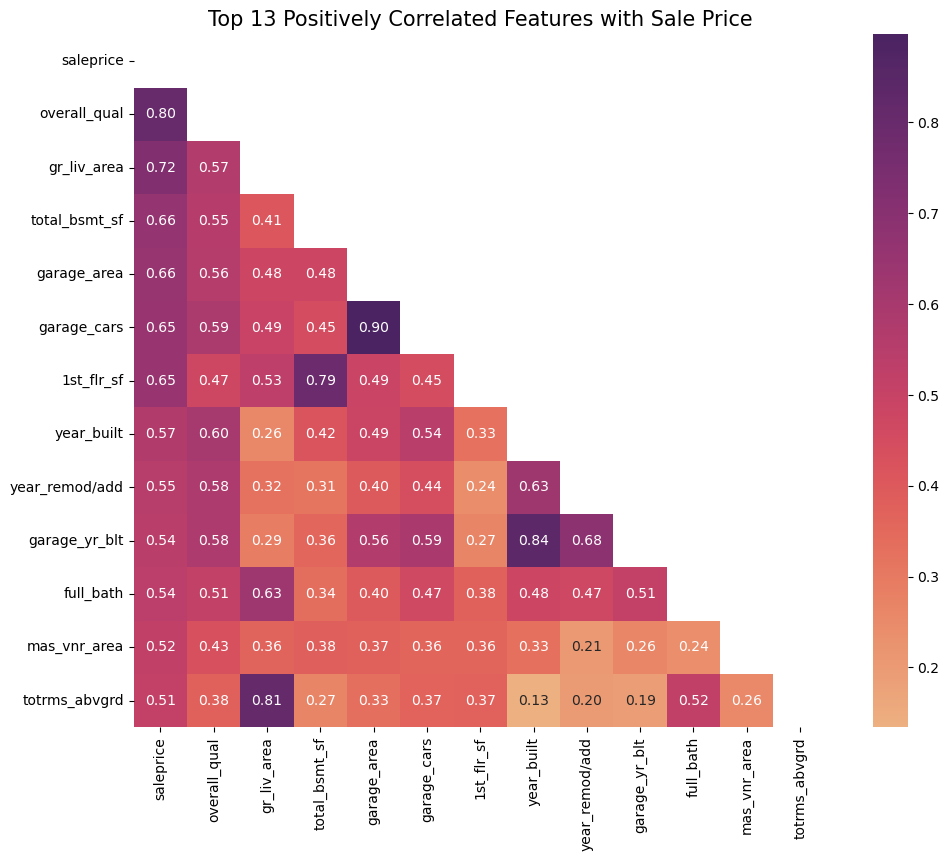

In [23]:
#only those with 0.5 or higher corr
top_corr = ames.corr()['saleprice'].sort_values(ascending=False).head(13).index

#Plot heatmap of top thirteen positively correlated features.
plt.figure(figsize=(12,9))
mask = np.triu(np.ones_like(ames[top_corr].corr(), dtype=bool))
ax = sns.heatmap(ames[top_corr].corr(), cmap='flare', mask=mask, square=True, annot=True, fmt='.2f')
plt.title('Top 13 Positively Correlated Features with Sale Price', fontsize=15);

Here, we see strong collinearity (appx more than 0.75) between a few variables:
   * `garage_cars` & `garage_area`: this seems obvious, they are essentially both measures of space, different units
   * `1st_flr_sf` & `total_bsmt_sf`: total_bsmt_sf seems like a sum of all the basement space
   * `garage_yr_blt` & `year_built`: these are likely to be the same for most homes. some homes may have had the garage as a later addition or might not have a garage, but otherwise these would be the same value
   * `totrms_abvgrd` & `gr_liv_area`: similar to the first entry, these are different ways of describing the same space: livable rooms/area

I would want to drop some of these columns from my dataset. I will *keep* the ones that have a higher correlation with SalePrice and drop their pairs. I will make a list of all the columns I am removing.

In [24]:
#drop_col already has the columns with too many nulls (over 25%)
#now I will add the columns that are highly collinear
drop_col.extend(['garage_cars', '1st_flr_sf', 'garage_yr_blt', 'totrms_abvgrd'])
drop_col

['alley',
 'fireplace_qu',
 'pool_qc',
 'fence',
 'misc_feature',
 'garage_cars',
 '1st_flr_sf',
 'garage_yr_blt',
 'totrms_abvgrd']

### Track my Work so Far

```
ames.columns = [col.lower().replace(' ', '_') for col in ames.columns]
ames['ms_subclass'] = 'ms' + ames['ms_subclass'].astype(str)

drop_col = ['alley', 'fireplace_qu', 'pool_qc', 'fence', 'misc_feature', 
            'garage_cars', '1st_flr_sf', 'garage_yr_blt', 'totrms_abvgrd']

nominal = ['ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'neighborhood', 
           'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 
           'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 
           'garage_type', 'misc_feature', 'sale_type']
ordinal = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 
           'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 
           'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 
           'pool_qc', 'fence']
discrete = ['year_built', 'year_remod/add', 'overall_qual', 'overall_cond', 'bsmt_full_bath', 
            'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 
            'fireplaces', 'garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold']
continuous = ['lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 
              'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'garage_area', 
              'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 
              'misc_val']
```

Rather than save my 'changes' to a csv and opening a new csv in the new notebook, I'm just tracking the small changes I made here.  I will reproduce this in the next notebook for both the train and test sets


In [25]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,ms60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,ms60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,ms20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,ms60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,ms50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
